In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as pl
import qnm_filter
import qnm
import astropy.constants as c
T_MSUN = c.M_sun.value * c.G.value / c.c.value**3

In [3]:
theoretical_values = [50, 0.70]
srate = 4096*4
t_range=np.arange(-1,1,1/srate)
chi=0.7

omega220=qnm.modes_cache(s=-2,l=2,m=2,n=0)(a=chi)[0]
signal=1e-22*np.real(np.exp(-1j*omega220*abs(t_range)/(theoretical_values[0]*T_MSUN)))
padded = qnm_filter.pad_data_for_fft(qnm_filter.RealData(signal, index=t_range), 2,2)
padded_data = qnm_filter.RealData(padded[1], index=padded[0])

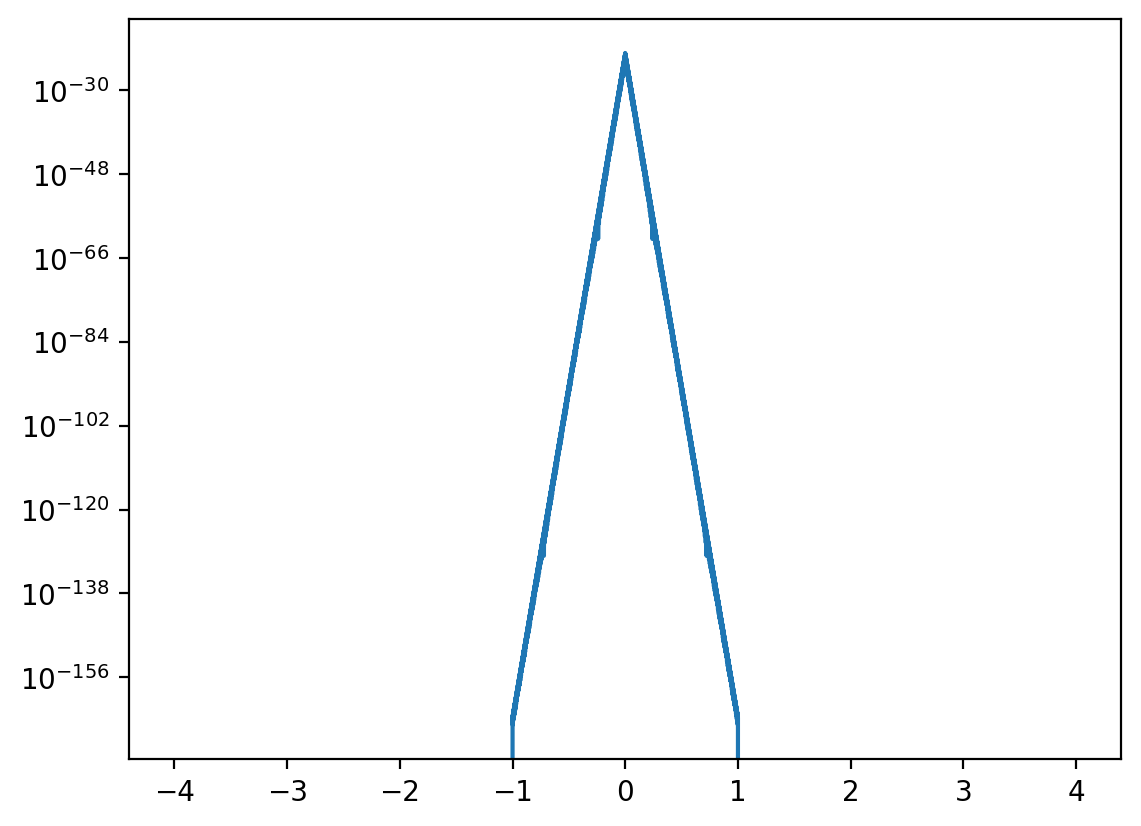

In [4]:
pl.semilogy(padded[0], np.abs(padded[1]))

In [5]:
fit=qnm_filter.Network()
fit.original_data['H1'] = padded_data

In [6]:
fit.add_filter(mass=50, chi=0.7, model_list=[(2,2,0,'p')])

(-0.1, 0.5)

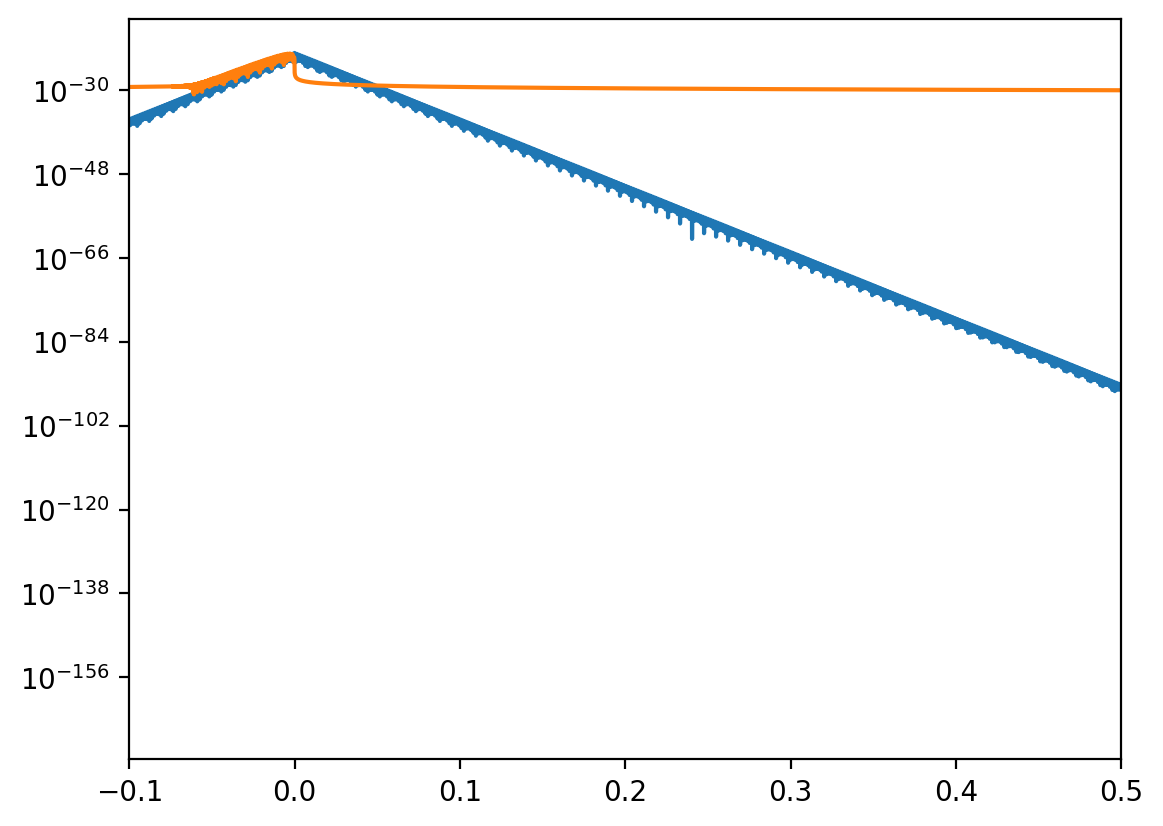

In [8]:
pl.semilogy(padded[0], abs(padded[1]))
pl.semilogy(fit.filtered_data['H1'].index, abs(fit.filtered_data['H1'].values))
pl.xlim(-0.1, 0.5)
# pl.ylim(1e-10, 1e1)

In [9]:
fit.srate=srate
fit.segment_length=0.2
fit.start_times['H1']=0

In [10]:
temp_acf = 0*fit.original_data['H1']
temp_acf.values[0] = 1*1e-23**2
fit.first_index()
fit.acfs['H1'] = qnm_filter.RealData(temp_acf, index = temp_acf.index)
fit.cholesky_decomposition()
data=fit.truncate_data(fit.original_data)
SNR=fit.compute_SNR(None, data['H1'], 'H1', optimal=True)
likelihood=fit.likelihood_vs_mass_spin(50, 0.7, model_list=[(2,2,0,'p')])
likelihood/SNR**2

-9.380961024635497e-10

In [11]:
temp_acf = 0*fit.original_data['H1']
temp_acf.values[0] = 1*1e-24**2
fit.first_index()
fit.acfs['H1'] = qnm_filter.RealData(temp_acf, index = temp_acf.index)
fit.cholesky_decomposition()
data=fit.truncate_data(fit.original_data)
SNR=fit.compute_SNR(None, data['H1'], 'H1', optimal=True)
likelihood=fit.likelihood_vs_mass_spin(50, 0.7, model_list=[(2,2,0,'p')])
likelihood/SNR**2

-9.380961024635489e-10

In [12]:
data=fit.truncate_data(fit.original_data)
SNR=fit.compute_SNR(None, data['H1'], 'H1', optimal=True)

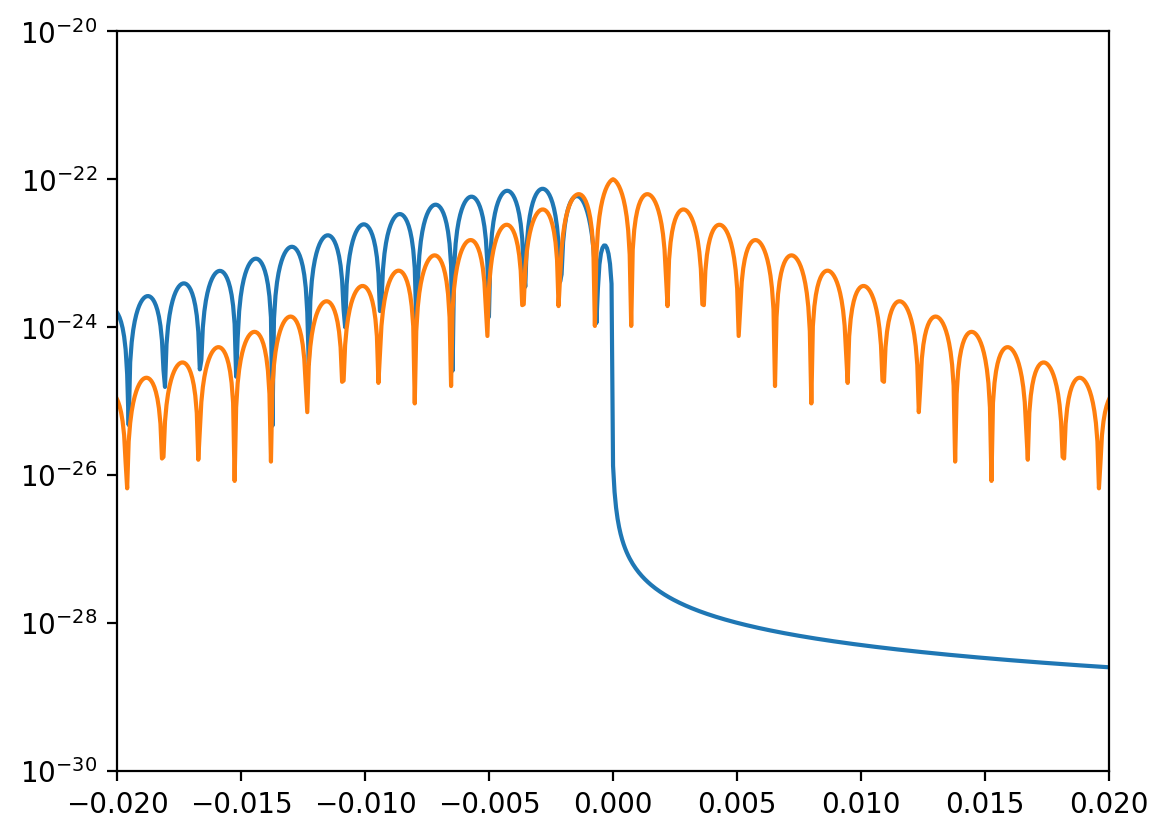

In [14]:
pl.semilogy(fit.filtered_data['H1'].index,abs(fit.filtered_data['H1'].values))
pl.semilogy(fit.original_data['H1'].index,abs(fit.original_data['H1'].values))
pl.xlim(-0.02, 0.02)
pl.ylim(1e-30, 1e-20)
pl.show()

In [ ]:
fit.add_filter(mass=50,chi=0.7,model_list=)